<a href="https://colab.research.google.com/github/denniss83/Perakende_Sektorunde_Finansal_Karsilastirma_2017_2024/blob/main/Perakende_Sekt%C3%B6r%C3%BCnde_Finansal_Kar%C5%9F%C4%B1la%C5%9Ft%C4%B1rma_(2017%E2%80%932024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lisans
Bu notebook, [Deniz Atabey](https://github.com/denniss83) tarafƒ±ndan hazƒ±rlanmƒ±≈ütƒ±r.  
Telif Hakkƒ± ¬© 2025 Deniz Atabey  
Bu √ßalƒ±≈üma [Creative Commons Atƒ±f-GayriTicari 4.0 Uluslararasƒ± (CC BY-NC 4.0)](https://creativecommons.org/licenses/by-nc/4.0/) lisansƒ± ile lisanslanmƒ±≈ütƒ±r.

- Yalnƒ±zca eƒüitim, akademik ve ki≈üisel kullanƒ±m i√ßindir.
- Ticari ama√ßlarla kullanƒ±lamaz.
- Herhangi bir kƒ±smƒ±nƒ± kullanƒ±rsanƒ±z l√ºtfen kaynak g√∂sterin.

# Perakende Sekt√∂r√ºnde Finansal Kar≈üƒ±la≈ütƒ±rma (2017‚Äì2024)

Bu analizde T√ºrkiye'nin d√∂rt b√ºy√ºk perakende zinciri olan **Migros, Bƒ∞M, ≈ûOK ve CarrefourSA**'nƒ±n 2017‚Äì2024 d√∂nemi finansal performanslarƒ± incelenmi≈ütir. Kar≈üƒ±la≈ütƒ±rmalar yƒ±llƒ±k bazda ve rasyolar √ºzerinden yapƒ±lmƒ±≈ü; b√ºy√ºkl√ºk, k√¢rlƒ±lƒ±k, bor√ßluluk ve likidite gibi temel g√∂stergeler analiz edilmi≈ütir.


---


>‚ÑπÔ∏è Kullanƒ±lan finansal veriler, ilgili ≈üirketlerin Kamuyu Aydƒ±nlatma Platformu (KAP) ve yƒ±llƒ±k faaliyet raporlarƒ±nda halka a√ßƒ±k olarak yayƒ±mlanan bilan√ßo ve gelir tablolarƒ±ndan derlenmi≈ütir. Herhangi bir ticari ama√ß ta≈üƒ±mamakta olup yalnƒ±zca veri analizi ve eƒüitim amacƒ±yla kullanƒ±lmƒ±≈ütƒ±r.


---




In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Veri Y√ºkleme

Veriler Migros, Bƒ∞M, ≈ûOK ve CarrefourSA'nƒ±n halka a√ßƒ±k olarak yayƒ±nlanan yƒ±llƒ±k bilan√ßo verilerine dayanmaktadƒ±r.

In [16]:
from google.colab import files
uploaded = files.upload()

Saving mig.xlsx to mig (1).xlsx


In [17]:
df = pd.read_excel("mig.xlsx")
df.head()

≈ûirket  Bilan√ßo  D√∂nen Varlƒ±klar  Nakit ve Nakit Benzerleri  \
0  Migros     2024      1632365.450                 637292.594   
1  Migros     2023      1854264.275                 604849.871   
2  Migros     2022      1795037.956                 675424.087   
3  Migros     2021       651817.869                 272024.339   
4  Migros     2020       986306.591                 434672.865   

   Finansal Yatƒ±rƒ±mlar  Ticari Alacaklar  Diƒüer Alacaklar      Stoklar  \
0              608.989         39556.245        30812.703   881403.528   
1            22642.610         18113.138       104144.578  1073556.473   
2            34137.359         42861.200         5457.346   989786.248   
3              194.413         13323.223         3125.066   350132.330   
4              790.964         23480.700         3747.494   449309.134   

   Diƒüer D√∂nen Varlƒ±klar  (Ara Toplam)  ...  Sermaye Artƒ±rƒ±mƒ±  \
0              42691.391   1632365.450  ...               0.0   
1              30957.604   1854264.275  ...               0.0   
2              47371.717   1795037.956  ...               0.0   
3              13018.498    651817.869  ...               0.0   
4              17446.554    929447.711  ...               0.0   

   Diƒüer Finansman Faaliyetlerinden Nakit  \
0                             -108474.259   
1                             -127887.215   
2                             -128161.278   
3                             -137022.076   
4                             -178699.393   

   Finansman Faaliyetlerden Kaynaklanan Nakit  \
0                                 -199381.725   
1                                 -207184.452   
2                                 -140954.950   
3                                 -249145.510   
4                                 -346271.572   

   Yab. Para √áev. Fark. Etk. √ñnc.Nak.Ve Nak. Benz. Net Artƒ±≈ü/Azalƒ±≈ü  \
0                                         148387.661                  
1                                         -22570.712                  
2                                         431714.016                  
3                                          58570.248                  
4                                         130598.669                  

   Yab.ƒ± Para √áevrim Fark. Nakit Ve Nakit Benz. √úzerindeki Etkisi  \
0                                          -5823.798                
1                                           4563.478                
2                                        -261968.955                
3                                         -13579.610                
4                                          -2177.716                

   Diƒüer Nakit Giri≈üi/√áƒ±kƒ±≈üƒ±  Nakit ve Benzerlerindeki Deƒüi≈üim  \
0                          0                        142563.863   
1                          0                        -18007.234   
2                          0                        169745.061   
3                          0                         44990.638   
4                          0                        128420.952   

   Diƒüer Nakit ve Nakit Benzerlerindeki Artƒ±≈ü  D√∂nem Ba≈üƒ± Nakit Deƒüerler  \
0                                           0                 542624.357   
1                                           0                 766597.479   
2                                           0                 591737.686   
3                                           0                 361987.701   
4                                           0                 331311.867   

   D√∂nem Sonu Nakit  
0        685188.220  
1        748590.246  
2        761482.747  
3        406978.338  
4        459732.819  

[5 rows x 139 columns]

In [18]:
print(df["≈ûirket"].unique())
print(df["Bilan√ßo"].unique())

['Migros' 'Bƒ∞M' 'CARREFOUR' '≈ûOK ']
[2024 2023 2022 2021 2020 2019 2018 2017]


In [19]:
df.isnull().sum().sort_values(ascending=False).head(15)

≈ûirket                                         0
Bilan√ßo                                        0
D√∂nen Varlƒ±klar                                0
Nakit ve Nakit Benzerleri                      0
Finansal Yatƒ±rƒ±mlar                            0
Ticari Alacaklar                               0
Diƒüer Alacaklar                                0
Stoklar                                        0
Diƒüer D√∂nen Varlƒ±klar                          0
(Ara Toplam)                                   0
Satƒ±≈ü Amacƒ±yla Elde Tutulan Duran Varlƒ±klar    0
Duran Varlƒ±klar                                0
Diƒüer Alacaklar4                               0
Finansal Yatƒ±rƒ±mlar6                           0
Yatƒ±rƒ±m Ama√ßlƒ± Gayrimenkuller                  0
dtype: int64

In [20]:
df.dtypes[df.dtypes == 'object']

≈ûirket    object
dtype: object

In [21]:
df = df.dropna(axis=1, how='all')

In [22]:
df.columns = df.columns.str.strip().str.replace("\n", " ").str.replace("  ", " ")

In [23]:
for col in df.columns:
    print(col)

≈ûirket
Bilan√ßo
D√∂nen Varlƒ±klar
Nakit ve Nakit Benzerleri
Finansal Yatƒ±rƒ±mlar
Ticari Alacaklar
Diƒüer Alacaklar
Stoklar
Diƒüer D√∂nen Varlƒ±klar
(Ara Toplam)
Satƒ±≈ü Amacƒ±yla Elde Tutulan Duran Varlƒ±klar
Duran Varlƒ±klar
Diƒüer Alacaklar4
Finansal Yatƒ±rƒ±mlar6
Yatƒ±rƒ±m Ama√ßlƒ± Gayrimenkuller
Kullanƒ±m Hakkƒ± Varlƒ±klarƒ±
Maddi Duran Varlƒ±klar
≈ûerefiye
Maddi Olmayan Duran Varlƒ±klar
Ertelenmi≈ü Vergi Varlƒ±ƒüƒ±
Diƒüer Duran Varlƒ±klar
TOPLAM VARLIKLAR
Kƒ±sa Vadeli Y√ºk√ºml√ºl√ºkler
Finansal Bor√ßlar
Diƒüer Finansal Y√ºk√ºml√ºl√ºkler
Ticari Bor√ßlar
Diƒüer Bor√ßlar
Ertelenmi≈ü Gelirler (M√º≈üteri S√∂z. Doƒüan Y√ºk. Dƒ±≈ü.Kal.)
D√∂nem Karƒ± Vergi Y√ºk√ºml√ºl√ºƒü√º
Bor√ß Kar≈üƒ±lƒ±klarƒ±
Diƒüer Kƒ±sa Vadeli Y√ºk√ºml√ºl√ºkler
(Ara Toplam)9
Satƒ±≈ü Ama√ßlƒ± Elde Tutulan Duran Varlƒ±klara ƒ∞li≈ükin Y√ºk√ºml√ºl√ºkler
Uzun Vadeli Y√ºk√ºml√ºl√ºkler
Finansal Bor√ßlar10
Diƒüer Finansal Y√ºk√ºml√ºl√ºkler11
Ticari Bor√ßlar12
Diƒüer Bor√ßlar13
M√º≈üteri S√∂z.Doƒüan Y√ºk.
Finans Sekt√∂r√º 

In [40]:
secili_kolonlar = [
    "≈ûirket", "Bilan√ßo",
    "TOPLAM VARLIKLAR",
    "Nakit ve Nakit Benzerleri",
    "Stoklar",
    "Kƒ±sa Vadeli Y√ºk√ºml√ºl√ºkler",
    "Uzun Vadeli Y√ºk√ºml√ºl√ºkler",
    "D√ñNEM KARI (ZARARI)",
    "Satƒ±≈ü Gelirleri"
]

In [41]:
print(df.columns[df.columns.str.contains("Ara", case=False)])

Index(['(Ara Toplam)', '(Ara Toplam)9',
       'Satƒ±≈ü Ama√ßlƒ± Elde Tutulan Duran Varlƒ±klara ƒ∞li≈ükin Y√ºk√ºml√ºl√ºkler',
       '√áalƒ±≈üanlara Saƒülanan Faydalara ƒ∞li≈ü.Kar≈ü.',
       'Yabancƒ± Para √áevrim Farklarƒ±', 'Ge√ßmi≈ü Yƒ±llar Kar/Zararlarƒ±',
       'D√∂nem Net Kar/Zararƒ±', 'Ticari Faaliyetlerden Diƒüer Kar (Zarar)',
       'Ticari Faaliyetlerden Br√ºt Kar (Zarar)',
       'Finans Sekt√∂r√º Faaliyetlerinden Diƒüer Kar (Zarar)',
       'Finans Sekt√∂r√º Faaliyetlerinden Br√ºt Kar (Zarar)', 'BR√úT KAR (ZARAR)',
       'Ara≈ütƒ±rma ve Geli≈ütirme Giderleri (-)', 'FAALƒ∞YET KARI (ZARARI)',
       'Net Faaliyet Kar/Zararƒ±',
       '√ñzkaynak Y√∂ntemiyle Deƒüerlenen Yatƒ±rƒ±mlarƒ±n Kar/Zararlarƒ±ndaki Paylar',
       'Finansman Gideri √ñncesi Faaliyet Karƒ±/Zararƒ±',
       'S√úRD√úR√úLEN FAALƒ∞YETLER VERGƒ∞ √ñNCESƒ∞ KARI (ZARARI)',
       'S√úRD√úR√úLEN FAALƒ∞YETLER D√ñNEM KARI/ZARARI',
       'Durdurulan Faaliyetler Vergi Sonrasƒ± D√∂nem Karƒ± (Zararƒ±)',
       'D√ñNE

In [42]:
df_kucuk = df[secili_kolonlar].copy()

df_long = pd.melt(
    df_kucuk,
    id_vars=["≈ûirket", "Bilan√ßo"],
    var_name="Metrik",
    value_name="Deƒüer"
)

df_long.head()

≈ûirket  Bilan√ßo            Metrik        Deƒüer
0  Migros     2024  TOPLAM VARLIKLAR  4245691.833
1  Migros     2023  TOPLAM VARLIKLAR  4510334.336
2  Migros     2022  TOPLAM VARLIKLAR  4357260.196
3  Migros     2021  TOPLAM VARLIKLAR  1355524.976
4  Migros     2020  TOPLAM VARLIKLAR  2068973.455

# Satƒ±≈ü Gelirleri (2017-2024)

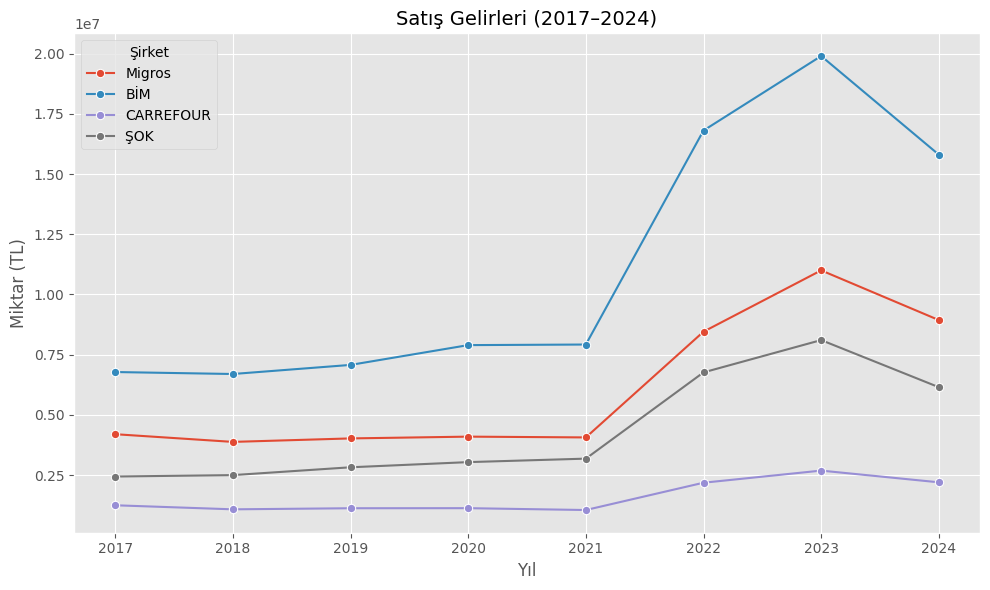

In [45]:
df_sat = df_long[df_long["Metrik"] == "Satƒ±≈ü Gelirleri"]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sat, x="Bilan√ßo", y="Deƒüer", hue="≈ûirket", marker="o")
plt.title("Satƒ±≈ü Gelirleri (2017‚Äì2024)", fontsize=14)
plt.ylabel("Miktar (TL)")
plt.xlabel("Yƒ±l")
plt.grid(True)
plt.tight_layout()
plt.show()

üìà Satƒ±≈ü Gelirleri Analizi (2017‚Äì2024)


>Bƒ∞M:
>
>- Her yƒ±l lider konumda.
>
>- 2022‚Äì2023 arasƒ±nda hƒ±zlƒ± bir sƒ±√ßrama olmu≈ü.
>
>- 2024'te bir miktar d√º≈ü√º≈ü var ama h√¢l√¢ en y√ºksek satƒ±≈üa sahip.
>
>Migros:
>
>- Satƒ±≈ülar sabit kalmƒ±≈ü gibi g√∂r√ºn√ºyor.
>
>- Bƒ∞M ile arasƒ± 2022 sonrasƒ± a√ßƒ±lmƒ±≈ü.
>
>Carrefour:
>- 2021 sonrasƒ± ciddi y√ºkselmi≈ü ama Bƒ∞M ve Migros'un altƒ±nda.
>
>≈ûOK:
>- En d√º≈ü√ºk satƒ±≈ü hacmine sahip.
>
>- 2022‚Äôde y√ºkselmi≈ü ama yine en alt d√ºzeyde seyrediyor.



# Toplam Varlƒ±klar (2017‚Äì2024)

üéØ Neden √ñnemli?

>- ≈ûirketin bilan√ßo b√ºy√ºkl√ºƒü√ºn√º g√∂sterir.
>
>- Zaman i√ßinde b√ºy√ºm√º≈ü m√º, k√º√ß√ºlm√º≈ü m√º net g√∂r√ºl√ºr.
>
>- Karlƒ±lƒ±k ile ili≈ükilendirilebilir (√∂rneƒüin: b√ºy√ºk varlƒ±ƒüƒ± olup zarar eden var mƒ±?)

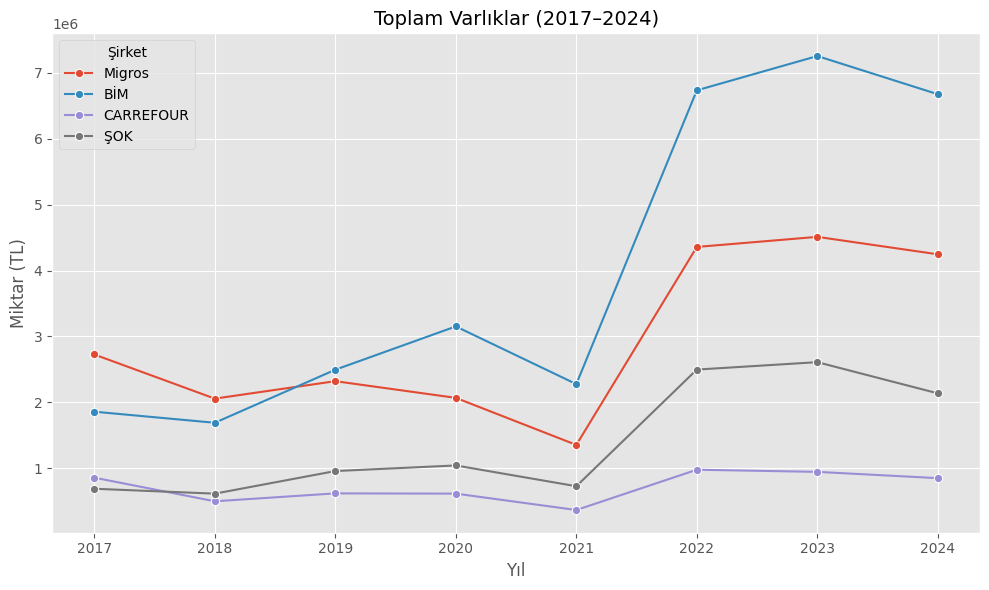

In [46]:
df_varlik = df_long[df_long["Metrik"] == "TOPLAM VARLIKLAR"]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_varlik, x="Bilan√ßo", y="Deƒüer", hue="≈ûirket", marker="o")
plt.title("Toplam Varlƒ±klar (2017‚Äì2024)", fontsize=14)
plt.ylabel("Miktar (TL)")
plt.xlabel("Yƒ±l")
plt.grid(True)
plt.tight_layout()
plt.show()

# D√ñNEM KARI/ZARARI (2017-2024)

üéØ Ama√ß:

>- Satƒ±≈ülar artƒ±yor ama ≈üirket k√¢r ediyor mu?
>
>- Hangi firma k√¢rlƒ± √ßalƒ±≈üƒ±yor, hangisi zarar ediyor?
>
>- Zaman i√ßinde istikrar var mƒ±?

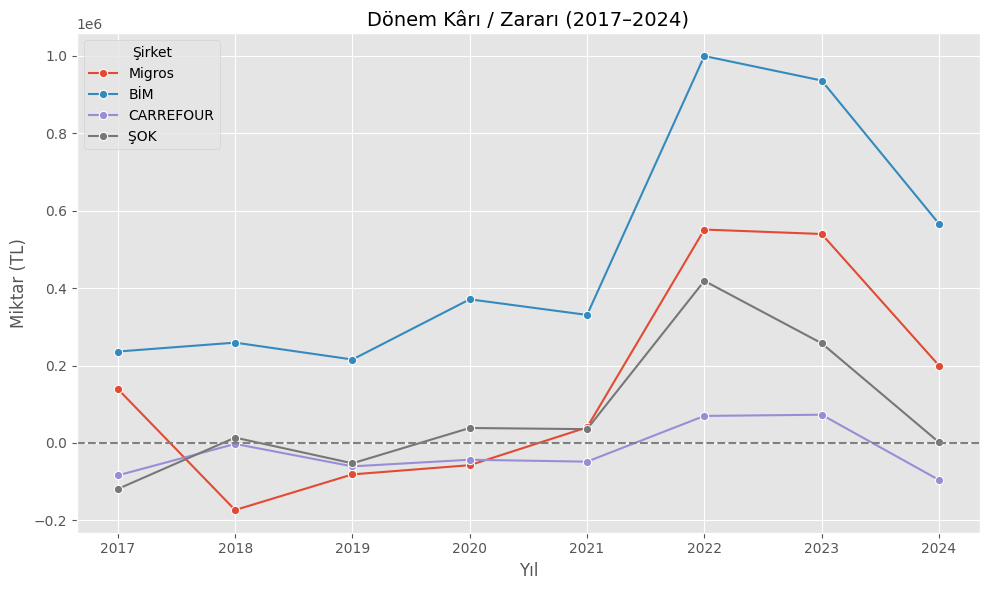

In [47]:
df_kar = df_long[df_long["Metrik"] == "D√ñNEM KARI (ZARARI)"]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_kar, x="Bilan√ßo", y="Deƒüer", hue="≈ûirket", marker="o")
plt.title("D√∂nem K√¢rƒ± / Zararƒ± (2017‚Äì2024)", fontsize=14)
plt.ylabel("Miktar (TL)")
plt.xlabel("Yƒ±l")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

# Bor√ß Analizi ‚Äì Kƒ±sa + Uzun Vadeli Y√ºk√ºml√ºl√ºkler

üéØ Ama√ß:
>
>- ≈ûirketlerin toplam bor√ß y√ºk√ºn√º analiz etmek
>
>- B√ºy√ºme bor√ßla mƒ±, √∂zkaynakla mƒ± olmu≈ü?
>
>- Yƒ±llar i√ßinde bor√ß yapƒ±sƒ±nda artƒ±≈ü/azalƒ±≈ü var mƒ±?

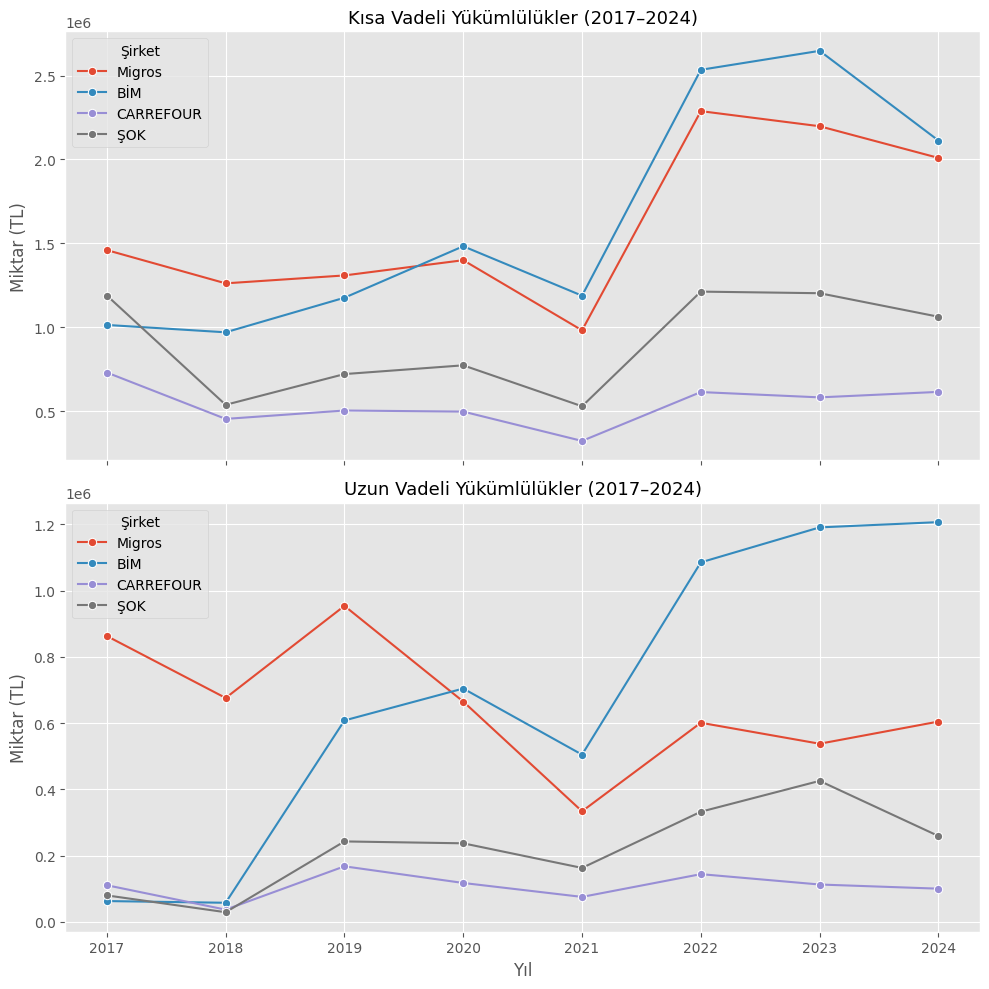

In [48]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

df_kv = df_long[df_long["Metrik"] == "Kƒ±sa Vadeli Y√ºk√ºml√ºl√ºkler"]
sns.lineplot(data=df_kv, x="Bilan√ßo", y="Deƒüer", hue="≈ûirket", marker="o", ax=ax[0])
ax[0].set_title("Kƒ±sa Vadeli Y√ºk√ºml√ºl√ºkler (2017‚Äì2024)", fontsize=13)
ax[0].set_ylabel("Miktar (TL)")
ax[0].grid(True)

df_uv = df_long[df_long["Metrik"] == "Uzun Vadeli Y√ºk√ºml√ºl√ºkler"]
sns.lineplot(data=df_uv, x="Bilan√ßo", y="Deƒüer", hue="≈ûirket", marker="o", ax=ax[1])
ax[1].set_title("Uzun Vadeli Y√ºk√ºml√ºl√ºkler (2017‚Äì2024)", fontsize=13)
ax[1].set_ylabel("Miktar (TL)")
ax[1].set_xlabel("Yƒ±l")
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Finansal Rasyolar Analizi

üéØ Ama√ß:
>
>≈ûirketlerin finansal yapƒ±larƒ±nƒ± normalize ederek kar≈üƒ±la≈ütƒ±rmak. Yani mutlak deƒüerler yerine oranlarla deƒüerlendirmek. B√∂ylece:
>
>≈ûirket b√ºy√ºkl√ºƒü√ºnden baƒüƒ±msƒ±z deƒüerlendirme yapƒ±lƒ±r
>
>Risk, k√¢rlƒ±lƒ±k ve bor√ßluluk net g√∂r√ºl√ºr

In [53]:
df_kucuk["Bor√ß_Varlƒ±k_Oranƒ±"] = (
    (df_kucuk["Kƒ±sa Vadeli Y√ºk√ºml√ºl√ºkler"] + df_kucuk["Uzun Vadeli Y√ºk√ºml√ºl√ºkler"]) / df_kucuk["TOPLAM VARLIKLAR"]
)

df_kucuk["Net_Kar_Marjƒ±"] = df_kucuk["D√ñNEM KARI (ZARARI)"] / df_kucuk["Satƒ±≈ü Gelirleri"]

df_kucuk["Hazƒ±r_Oranƒ±"] = df_kucuk["Nakit ve Nakit Benzerleri"] / df_kucuk["Kƒ±sa Vadeli Y√ºk√ºml√ºl√ºkler"]

df_kucuk["Stok_Varlƒ±k_Oranƒ±"] = df_kucuk["Stoklar"] / df_kucuk["TOPLAM VARLIKLAR"]

In [54]:
df_rasyolar = df_kucuk[[
    "≈ûirket", "Bilan√ßo",
    "Bor√ß_Varlƒ±k_Oranƒ±",
    "Net_Kar_Marjƒ±",
    "Hazƒ±r_Oranƒ±",
    "Stok_Varlƒ±k_Oranƒ±"
]]

df_rasyolar_long = df_rasyolar.melt(id_vars=["≈ûirket", "Bilan√ßo"],
                                    var_name="Rasyo",
                                    value_name="Deƒüer")

# Bor√ß / Toplam Varlƒ±k Oranƒ±

üéØ Ama√ß:

>- Oran 0.5 ise: Varlƒ±klarƒ±n %50‚Äôsi bor√ßla finanse ediliyor demektir.
>
>- Zamanla artƒ±yorsa: ≈ûirket daha fazla bor√ßlanƒ±yor.
>
>- Diƒüer ≈üirketlerle kar≈üƒ±la≈ütƒ±rƒ±ldƒ±ƒüƒ±nda y√ºksekse: Daha riskli olabilir.

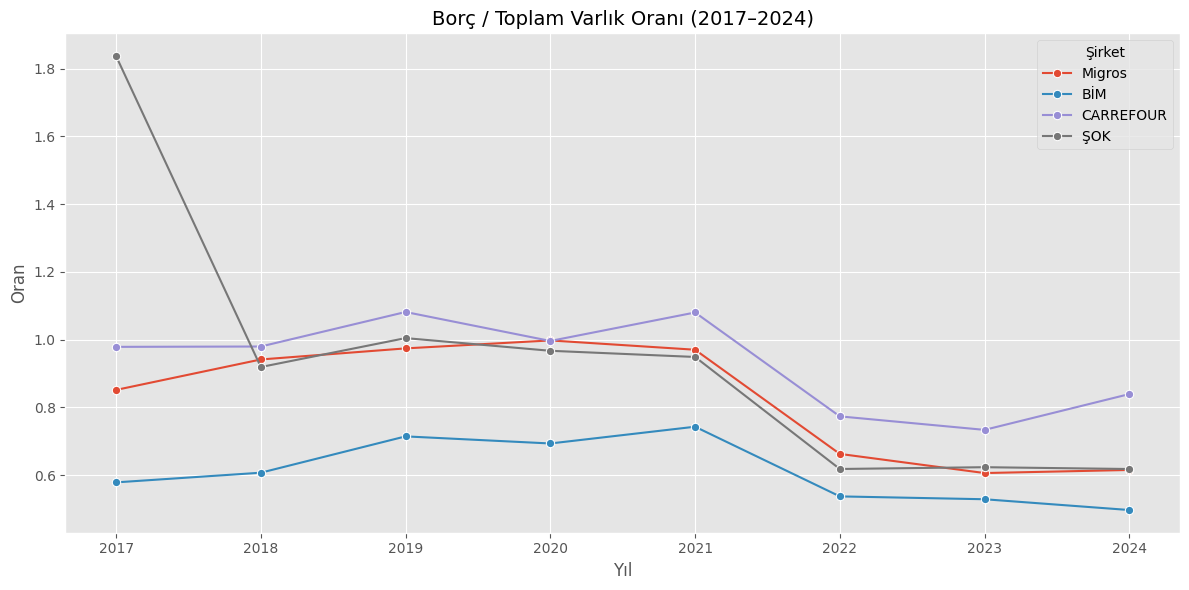

In [56]:
df_borc = df_rasyolar_long[df_rasyolar_long["Rasyo"] == "Bor√ß_Varlƒ±k_Oranƒ±"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_borc, x="Bilan√ßo", y="Deƒüer", hue="≈ûirket", marker="o")
plt.title("Bor√ß / Toplam Varlƒ±k Oranƒ± (2017‚Äì2024)", fontsize=14)
plt.xlabel("Yƒ±l")
plt.ylabel("Oran")
plt.grid(True)
plt.tight_layout()
plt.show()

# Net K√¢r Marjƒ± (Karlƒ±lƒ±k Oranƒ±)

üéØ Ama√ß:
>
>- Y√ºksek marj: Verimli ve k√¢rlƒ± operasyonlarƒ± i≈üaret eder.
>
>- D√º≈ü√ºk hatta negatif marj: Zarar veya d√º≈ü√ºk k√¢rlƒ±lƒ±k anlamƒ±na gelir.
>
>- Yƒ±llar i√ßindeki eƒüilim: ≈ûirketlerin k√¢rlƒ±lƒ±k geli≈üimi ve s√ºrd√ºr√ºlebilirliƒüi hakkƒ±nda ipucu verir.

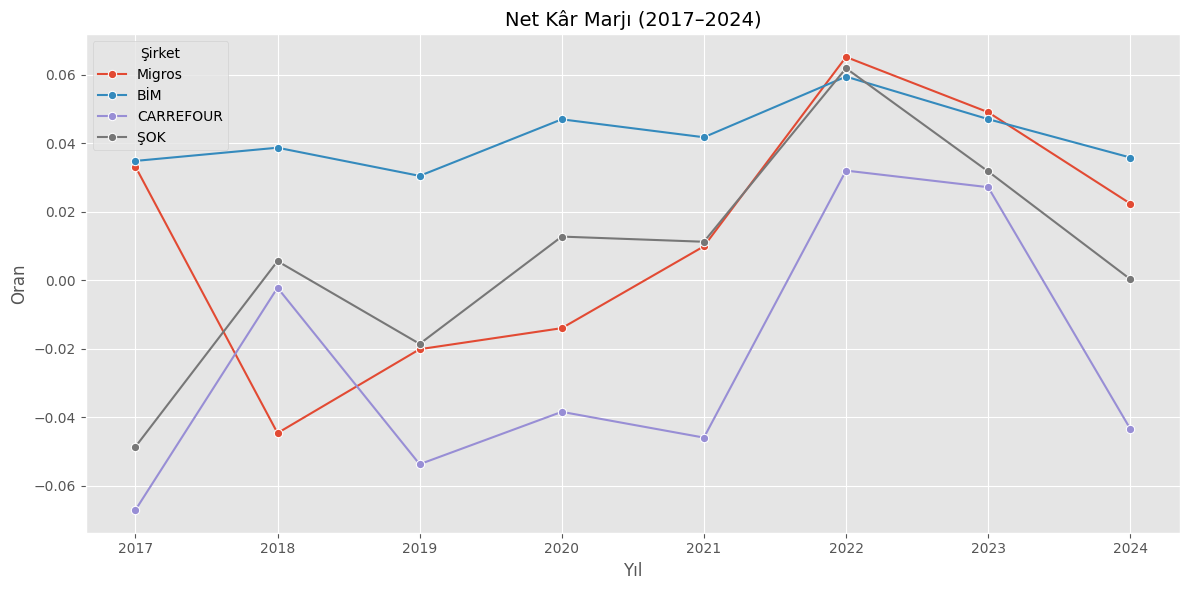

In [57]:
df_kar = df_rasyolar_long[df_rasyolar_long["Rasyo"] == "Net_Kar_Marjƒ±"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_kar, x="Bilan√ßo", y="Deƒüer", hue="≈ûirket", marker="o")
plt.title("Net K√¢r Marjƒ± (2017‚Äì2024)", fontsize=14)
plt.xlabel("Yƒ±l")
plt.ylabel("Oran")
plt.grid(True)
plt.tight_layout()
plt.show()

# Hazƒ±r Oran ‚Äì Likidite G√∂stergesi

üéØ Tanƒ±m:
>
>- Hazƒ±r Oran = Nakit ve Benzerleri / Kƒ±sa Vadeli Y√ºk√ºml√ºl√ºkler
>
>- Bu oran ≈üirketin kƒ±sa vadeli bor√ßlarƒ±nƒ± hemen √∂deyebilme kabiliyetini g√∂sterir.
>
>- >1 olmasƒ± idealdir (nakit > bor√ß)

>- <1 ise kƒ±sa vadeli √∂deme sƒ±kƒ±ntƒ±sƒ± riski ta≈üƒ±yabilir

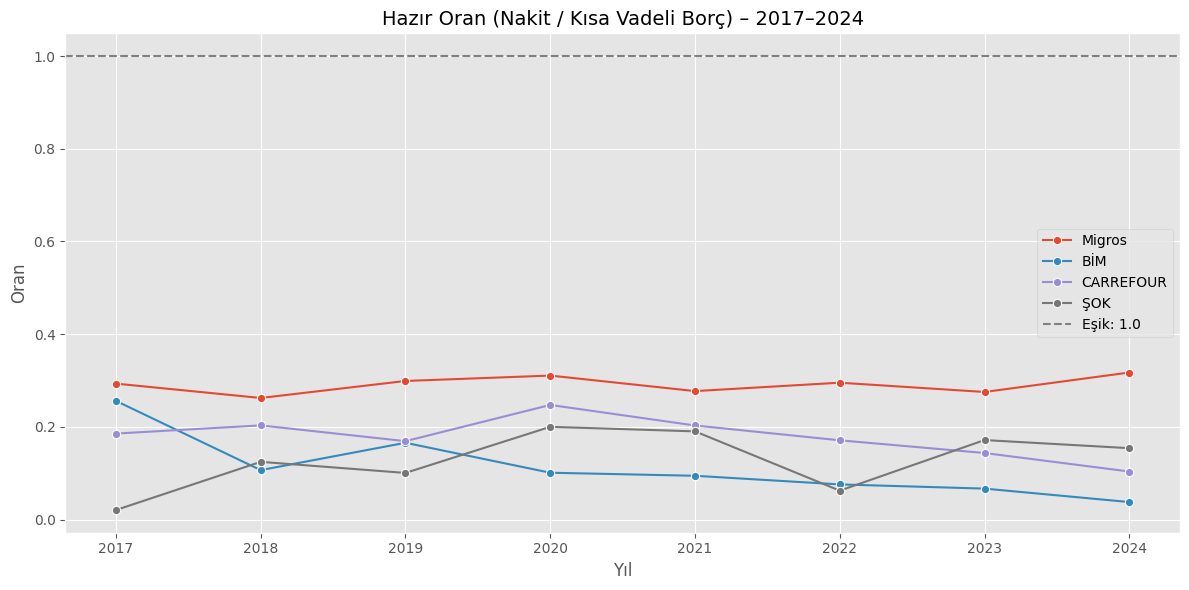

In [58]:
df_hazir = df_rasyolar_long[df_rasyolar_long["Rasyo"] == "Hazƒ±r_Oranƒ±"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hazir, x="Bilan√ßo", y="Deƒüer", hue="≈ûirket", marker="o")
plt.title("Hazƒ±r Oran (Nakit / Kƒ±sa Vadeli Bor√ß) ‚Äì 2017‚Äì2024", fontsize=14)
plt.xlabel("Yƒ±l")
plt.ylabel("Oran")
plt.axhline(1, color='gray', linestyle='--', label='E≈üik: 1.0')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Stok / Varlƒ±k Oranƒ± ‚Äì Envanter Yoƒüunluƒüu

üéØ Tanƒ±m:
>
>- Stok Oranƒ± = Stoklar / Toplam Varlƒ±klar
>
>- ≈ûirketin varlƒ±klarƒ±nƒ±n ne kadarƒ±nƒ±n stoklara baƒülƒ± olduƒüunu g√∂sterir.
>
>- Y√ºksek oran, nakde d√∂n√º≈ümesi zaman alabilecek varlƒ±klara fazla baƒülƒ±lƒ±k anlamƒ±na gelir.
>
>- D√º≈ü√ºk oran, daha √ßevik ve likit bir yapƒ± g√∂stergesidir.

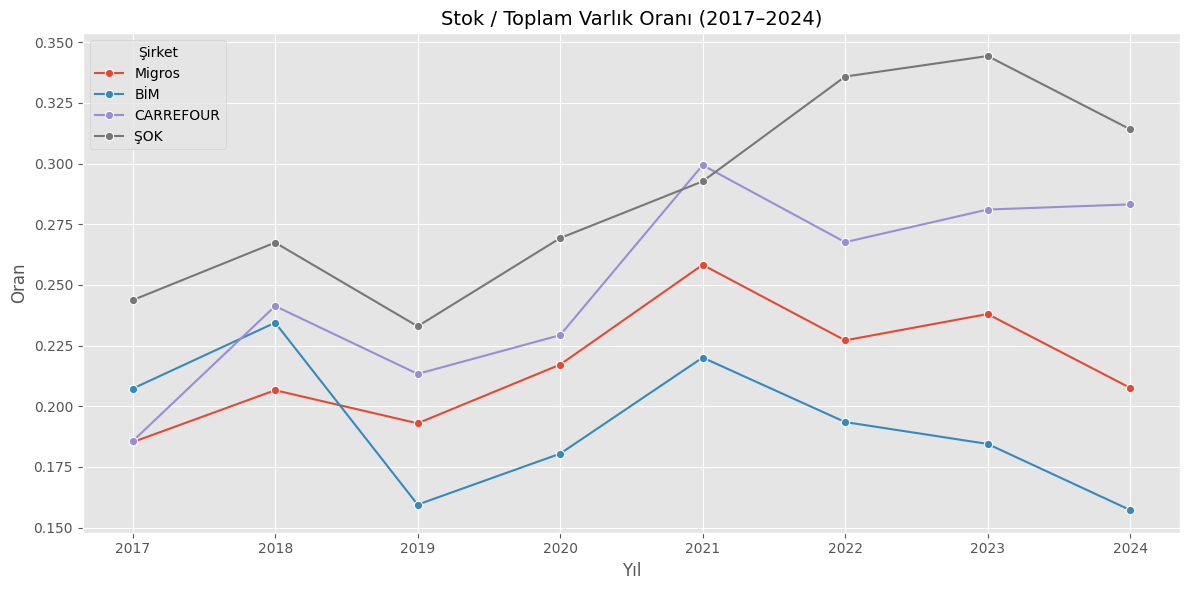

In [59]:
df_stok = df_rasyolar_long[df_rasyolar_long["Rasyo"] == "Stok_Varlƒ±k_Oranƒ±"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_stok, x="Bilan√ßo", y="Deƒüer", hue="≈ûirket", marker="o")
plt.title("Stok / Toplam Varlƒ±k Oranƒ± (2017‚Äì2024)", fontsize=14)
plt.xlabel("Yƒ±l")
plt.ylabel("Oran")
plt.grid(True)
plt.tight_layout()
plt.show()

# üßÆ 1. Aktif Karlƒ±lƒ±k (ROA ‚Äì Return on Assets)

- ≈ûirketin toplam varlƒ±klarƒ± √ºzerinden ne kadar k√¢r elde ettiƒüini g√∂sterir.

- ROA = D√∂nem Karƒ± (Zararƒ±) / Toplam Varlƒ±klar

In [71]:
df["ROA"] = df["D√ñNEM KARI (ZARARI)"] / df["TOPLAM VARLIKLAR"]

In [72]:
df_roa_long = df[["≈ûirket", "Bilan√ßo", "ROA"]].copy()
df_roa_long = df_roa_long.rename(columns={"ROA": "Deƒüer"})
df_roa_long["Rasyo"] = "ROA"

df_rasyolar_long = pd.concat([df_rasyolar_long, df_roa_long], ignore_index=True)

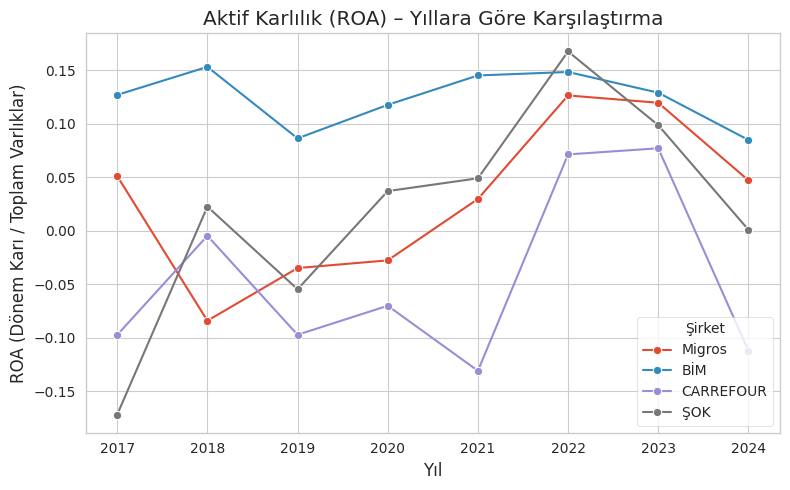

In [75]:
df_roa_only = df_rasyolar_long[df_rasyolar_long["Rasyo"] == "ROA"]

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

sns.lineplot(data=df_roa_only, x="Bilan√ßo", y="Deƒüer", hue="≈ûirket", marker="o")

plt.title("Aktif Karlƒ±lƒ±k (ROA) ‚Äì Yƒ±llara G√∂re Kar≈üƒ±la≈ütƒ±rma")
plt.xlabel("Yƒ±l")
plt.ylabel("ROA (D√∂nem Karƒ± / Toplam Varlƒ±klar)")
plt.legend(title="≈ûirket")
plt.tight_layout()
plt.show()

## ≈ûirket Bazlƒ± Ortalama ROA (2017‚Äì2024)

In [77]:
roa_ortalama = df_roa_only.groupby("≈ûirket")["Deƒüer"].mean().sort_values(ascending=False).reset_index()

print("üîé 2017‚Äì2024 D√∂neminde ≈ûirket Bazlƒ± Ortalama ROA:")
display(roa_ortalama)

üîé 2017‚Äì2024 D√∂neminde ≈ûirket Bazlƒ± Ortalama ROA:


≈ûirket     Deƒüer
0        Bƒ∞M  0.123958
1     Migros  0.028398
2       ≈ûOK   0.018634
3  CARREFOUR -0.045528

## Yƒ±l Bazƒ±nda En Y√ºksek ROA‚Äôya Sahip ≈ûirket

In [78]:
roa_max_yil = df_roa_only.loc[df_roa_only.groupby("Bilan√ßo")["Deƒüer"].idxmax()].reset_index(drop=True)

print("üèÜ Yƒ±llƒ±k En Y√ºksek ROA‚Äôya Sahip ≈ûirketler:")
display(roa_max_yil[["Bilan√ßo", "≈ûirket", "Deƒüer"]])

üèÜ Yƒ±llƒ±k En Y√ºksek ROA‚Äôya Sahip ≈ûirketler:


Bilan√ßo ≈ûirket     Deƒüer
0     2017    Bƒ∞M  0.126989
1     2018    Bƒ∞M  0.153191
2     2019    Bƒ∞M  0.086347
3     2020    Bƒ∞M  0.117673
4     2021    Bƒ∞M  0.145159
5     2022   ≈ûOK   0.167568
6     2023    Bƒ∞M  0.129045
7     2024    Bƒ∞M  0.084850

# ROE (√ñzsermaye Karlƒ±lƒ±ƒüƒ±)

In [81]:
df_kucuk["ROE"] = df_kucuk["D√ñNEM KARI (ZARARI)"] / df_kucuk["TOPLAM VARLIKLAR"]



df_roe_long = df_kucuk[["≈ûirket", "Bilan√ßo", "ROE"]].rename(columns={"ROE": "Deƒüer"})
df_roe_long["Rasyo"] = "ROE"

df_rasyolar_long = pd.concat([df_rasyolar_long, df_roe_long], ignore_index=True)


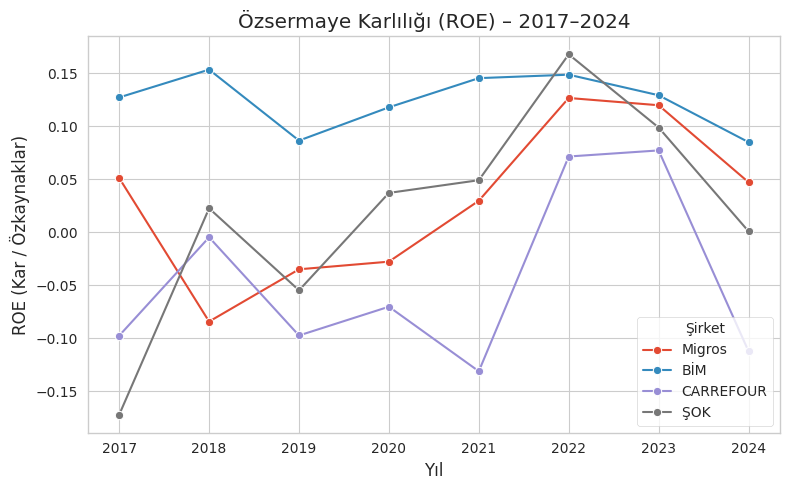

In [82]:
df_roe_only = df_rasyolar_long[df_rasyolar_long["Rasyo"] == "ROE"]

plt.figure(figsize=(8, 5))
sns.lineplot(data=df_roe_only, x="Bilan√ßo", y="Deƒüer", hue="≈ûirket", marker="o")
plt.title("√ñzsermaye Karlƒ±lƒ±ƒüƒ± (ROE) ‚Äì 2017‚Äì2024")
plt.xlabel("Yƒ±l")
plt.ylabel("ROE (Kar / √ñzkaynaklar)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [84]:
roe_ortalama = df_roe_only.groupby("≈ûirket")["Deƒüer"].mean().sort_values(ascending=False).reset_index()
print("üîé Ortalama ROE (2017‚Äì2024):")
display(roe_ortalama)

roe_max_yil = df_roe_only.loc[df_roe_only.groupby("Bilan√ßo")["Deƒüer"].idxmax()].reset_index(drop=True)
print("üèÜ Yƒ±l Bazƒ±nda En Y√ºksek ROE'ya Sahip ≈ûirketler:")
display(roe_max_yil[["Bilan√ßo", "≈ûirket", "Deƒüer"]])

üîé Ortalama ROE (2017‚Äì2024):


≈ûirket     Deƒüer
0        Bƒ∞M  0.123958
1     Migros  0.028398
2       ≈ûOK   0.018634
3  CARREFOUR -0.045528

üèÜ Yƒ±l Bazƒ±nda En Y√ºksek ROE'ya Sahip ≈ûirketler:


Bilan√ßo ≈ûirket     Deƒüer
0     2017    Bƒ∞M  0.126989
1     2018    Bƒ∞M  0.153191
2     2019    Bƒ∞M  0.086347
3     2020    Bƒ∞M  0.117673
4     2021    Bƒ∞M  0.145159
5     2022   ≈ûOK   0.167568
6     2023    Bƒ∞M  0.129045
7     2024    Bƒ∞M  0.084850

# üìäDashboard Grafik

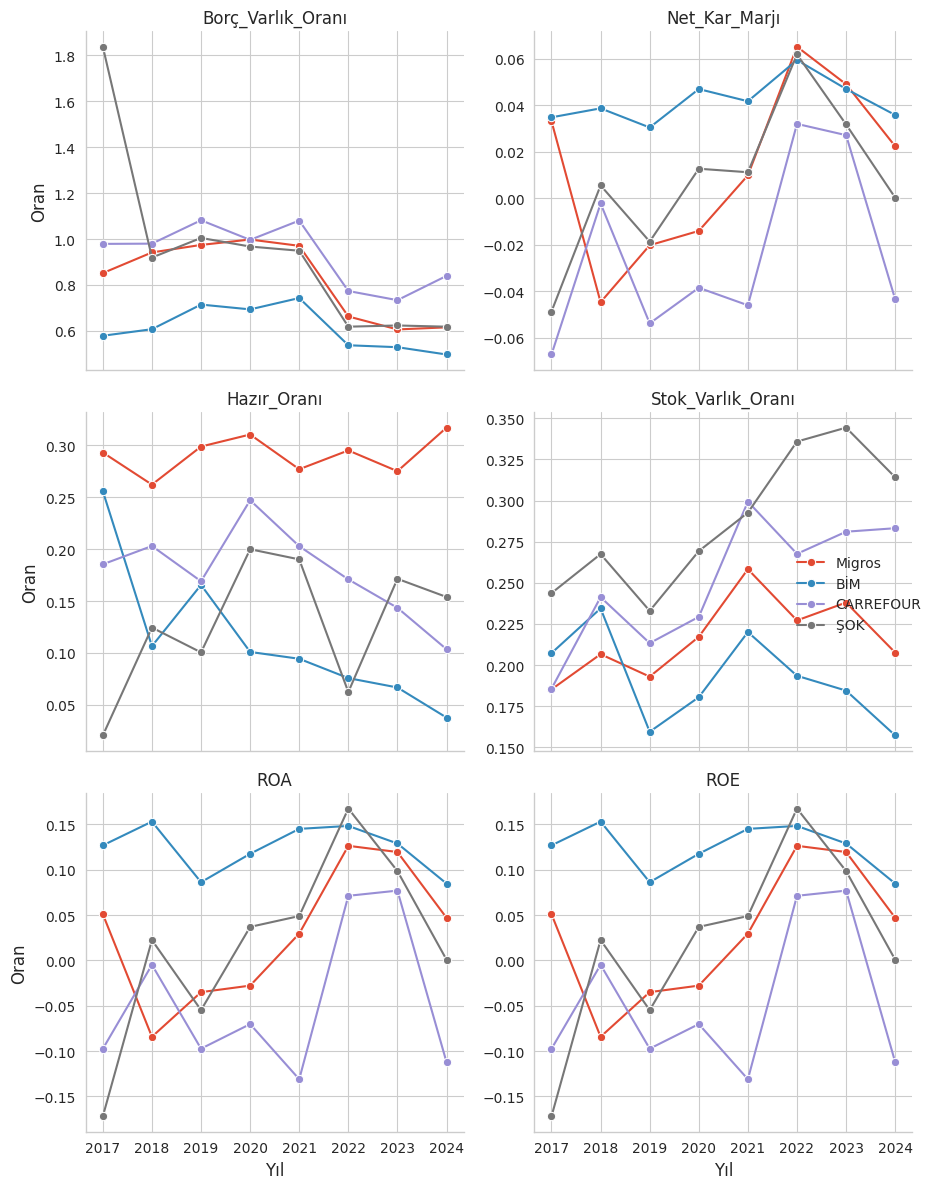

In [83]:
g = sns.FacetGrid(df_rasyolar_long, col="Rasyo", col_wrap=2, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x="Bilan√ßo", y="Deƒüer", hue="≈ûirket", marker="o")
g.set_titles("{col_name}")
g.set_axis_labels("Yƒ±l", "Oran")
g.add_legend()
plt.tight_layout()
plt.show()

# üìå Genel Deƒüerlendirme ve Sonu√ß

Bu √ßalƒ±≈ümada T√ºrkiye‚Äônin √∂nde gelen d√∂rt perakende zinciri olan **Migros, Bƒ∞M, ≈ûOK ve CarrefourSA**‚Äônƒ±n 2017‚Äì2024 d√∂nemine ait finansal tablolarƒ± analiz edilmi≈ütir. Analiz kapsamƒ±nda ≈üirketlerin hem mutlak b√ºy√ºkl√ºkleri hem de rasyolar √ºzerinden g√∂reli performanslarƒ± deƒüerlendirilmi≈ütir.

---

### 1. B√ºy√ºkl√ºk ve Satƒ±≈ü Performansƒ±

- **Bƒ∞M**, satƒ±≈ü gelirleri ve toplam varlƒ±klar a√ßƒ±sƒ±ndan her yƒ±l lider konumdadƒ±r.
- **Migros**, istikrarlƒ± b√ºy√ºme g√∂stermi≈ütir.
- **CarrefourSA**, √∂zellikle 2021 sonrasƒ± dikkat √ßeken bir b√ºy√ºme ivmesi yakalamƒ±≈ütƒ±r.
- **≈ûOK**, daha d√º≈ü√ºk bir hacme sahip olsa da stabil bir b√ºy√ºme trendi i√ßindedir.

---

### 2. K√¢rlƒ±lƒ±k (Net K√¢r Marjƒ± ve ROA)

- **Bƒ∞M**, net k√¢r marjƒ± ve ROA a√ßƒ±sƒ±ndan en istikrarlƒ± ve y√ºksek k√¢rlƒ±lƒ±ƒüa sahip firmadƒ±r.
- **Migros** ve **CarrefourSA**, dalgalƒ± bir k√¢rlƒ±lƒ±k yapƒ±sƒ±na sahiptir.
- **≈ûOK**, √ßoƒüu yƒ±l zarar a√ßƒ±klamƒ±≈ütƒ±r ve negatif marjlar g√∂stermektedir.

---

### 3. Bor√ßluluk Yapƒ±sƒ±

- **≈ûOK** ve **Migros**, en y√ºksek bor√ß/varlƒ±k oranƒ±na sahiptir.
- **Bƒ∞M**, bor√ßluluk a√ßƒ±sƒ±ndan en saƒülam yapƒ±dadƒ±r.

---

### 4. Likidite (Hazƒ±r Oran)

- T√ºm ≈üirketlerde hazƒ±r oran √ßoƒüunlukla 1‚Äôin altƒ±ndadƒ±r, bu da kƒ±sa vadeli bor√ß √∂deme kapasitesinde sƒ±kƒ±ntƒ± olabileceƒüini g√∂sterir.
- En y√ºksek hazƒ±r oran **Migros**‚Äôtadƒ±r.

---

### 5. Stok Y√∂netimi

- **CarrefourSA**, envanter yoƒüunluƒüu en y√ºksek ≈üirkettir.
- **Bƒ∞M**, d√º≈ü√ºk stok oranƒ± ile tedarik zinciri verimliliƒüini g√∂stermektedir.

---

## üîç Genel Bakƒ±≈ü:

- **Bƒ∞M**, finansal saƒülamlƒ±k ve operasyonel verimlilik a√ßƒ±sƒ±ndan en g√º√ßl√º ≈üirket olarak √∂ne √ßƒ±kmaktadƒ±r.
- **Migros** ve **CarrefourSA**, zaman zaman g√º√ßl√º k√¢rlƒ±lƒ±klar sergileseler de y√ºksek bor√ßluluk ve d√º≈ü√ºk likidite ile dengelenmektedir.
- **≈ûOK**, agresif b√ºy√ºme yerine istikrarlƒ± ve d√º≈ü√ºk riskli yapƒ±ya odaklanmalƒ±dƒ±r.




---



> ‚ùóÔ∏è Bu analiz yalnƒ±zca python ile eƒüitim ve veri analizi amacƒ±yla hazƒ±rlanmƒ±≈ütƒ±r. Hi√ßbir ticari ama√ß g√ºd√ºlmemektedir. Yatƒ±rƒ±m tavsiyesi i√ßermez.

---

